In [1]:
import os 
import numpy as np 
from matplotlib import pyplot as plt 
import cv2 

In [2]:
os.chdir("d:\\Desktop\\goruntu_isleme-derin_ogrenme\\opencv_nesne_tespiti\\özellik_eslestirme\\input")

In [3]:
img = cv2.imread("chocolates.jpg")

In [4]:
nesne = cv2.imread("nestle.jpg")

In [5]:
# orb tanımlayıcısı
# köse kenar gibi özellikler tespit edilecek
orb = cv2.ORB_create()

In [6]:
kp1, des1 = orb.detectAndCompute(nesne , None) # anahtar nokta tespiti
kp2, des2 = orb.detectAndCompute(img , None) 

In [7]:
#brut force esleme
bf = cv2.BFMatcher(cv2.NORM_HAMMING) #nokta esleme

In [9]:
matches = bf.match(des1 , des2)

In [10]:
# mesafeye göre sıralama
matches = sorted(matches , key = lambda x : x.distance )

In [14]:
img_match = cv2.drawMatches(nesne , kp1 , img,kp2 ,matches[:20],None, 2)

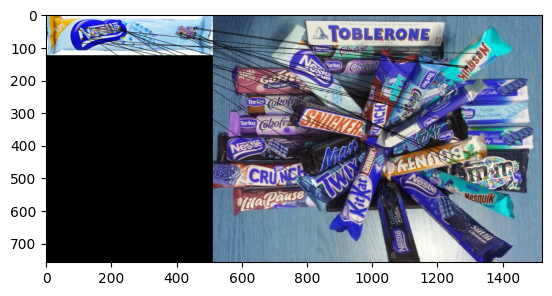

In [15]:
plt.imshow(img_match)

In [ ]:
# sift tanımlayıcı
sift = cv2.SIFT_create() # özellikleri cıkarmak için kullanılır

In [19]:
bf = cv2.BFMatcher() # esleme islemi

In [20]:
# anahtar nokta tespit sift ile 

kp1 ,des1  =sift.detectAndCompute(nesne , None)
kp2 ,des2  =sift.detectAndCompute(img , None)

In [21]:
matches = bf.knnMatch(des1 , des2 , k = 2)

In [22]:
guzel_eslesme = []

In [23]:
for match1 , match2 in matches:
    
    if match1.distance < 0.75 * match2.distance:
        guzel_eslesme.append([match1])

In [24]:
sift_matches = cv2.drawMatchesKnn(nesne , kp1 , img , kp2,guzel_eslesme , None , 2)

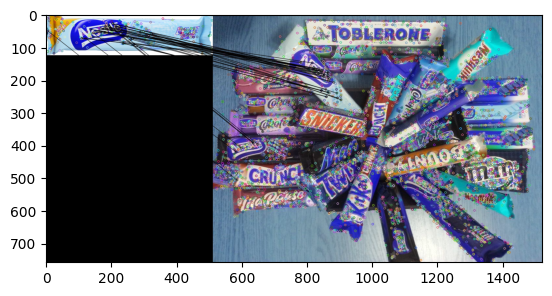

In [25]:
plt.imshow(sift_matches)